In [86]:
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [87]:
import numpy as np
import pandas as pd

In [88]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [90]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [91]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [92]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [93]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [94]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [95]:
# Create our session (link) from Python to the DB
session = Session(engine)
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x14aa50968b0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

## Exploratory Climate Analysis

In [97]:
last_date = session.query(Measurement.date).order_by((Measurement.date).desc()).all()
last_date

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Calculate the date 1c  year ago from the last data point in the database
oneyear= dt.date(2017,8,23)-dt.timedelta(days=365)
oneyear

datetime.date(2016, 8, 23)

In [101]:
# Perform a query to retrieve the data and precipitation scores
results =session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date >= oneyear).\
order_by(Measurement.prcp).all()
results

[('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-08-31', None),
 ('2016-09-05', None),
 ('2016-09-12', None),
 ('2016-09-19', None),
 ('2016-10-10', None),
 ('2016-10-17', None),
 ('2016-10-23', None),
 ('2016-11-22', None),
 ('2016-11-25', None),
 ('2016-12-07', None),
 ('2016-12-12', None),
 ('2016-12-26', None),
 ('2017-01-13', None),
 ('2017-01-16', None),
 ('2017-01-23', None),
 ('2017-01-25', None),
 ('2017-01-30', None),
 ('2017-02-05', None),
 ('2017-02-20', None),
 ('2017-02-26', None),
 ('2017-03-03', None),
 ('2017-03-06', None),
 ('2017-03-12', None),
 ('2017-03-16', None),
 ('2017-03-20', None),
 ('2017-03-27', None),
 ('2017-04-09', None),
 ('2017-04-17', None),
 ('2017-04-24', None),
 ('2017-05-12', None),
 ('2017-05-15', None),
 ('2017-05-22', None),
 ('2017-06-23', None),
 ('2017-06-26', None),
 ('2017-06-29', None),
 ('2017-07-03', None),
 ('2017-07-05', None),
 ('2017-07-07', None),
 ('2017-07-31', None),
 ('2017-08-13', None),
 ('2016-08-23', None),
 ('2016-08-

In [102]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['dates', 'precipitation'])
df = df.sort_values("dates")
df.head(10)

,dates,precipitation
2085,2016-08-23,0.70
209,2016-08-23,0.00
1761,2016-08-23,0.15
42,2016-08-23,NaN
1444,2016-08-23,0.05
1258,2016-08-23,0.02
2189,2016-08-23,1.79
1572,2016-08-24,0.08
43,2016-08-24,NaN
2208,2016-08-24,2.28


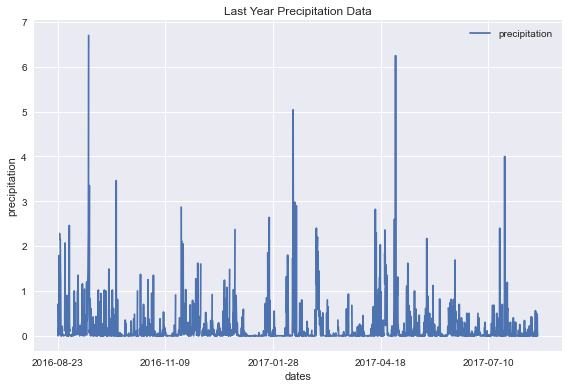

In [104]:

# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="dates",y = "precipitation",title="Last Year Precipitation Data")
plt.xlabel('dates')
plt.ylabel('precipitation')
plt.tight_layout()
plt.show()

In [105]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [106]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [107]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [109]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

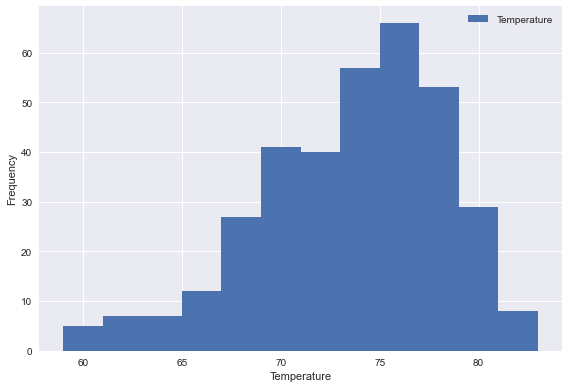

In [115]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Results= session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date >= oneyear).all()
Results
df2=pd.DataFrame(Results,columns=['Temperature'])
df2.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

In [116]:
session.close()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
